In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import Ridge, Lasso

# Task 1 (3 points + 2 bonus points for a well organized and easy to read plot + 1 bonus point for the short comment)

Consider the following toy dataset with pairs of correlated features:

In [9]:
import numpy as np 

def gen_data(N, correlation=0.5):
  # start from 4 independent features:
  X = np.random.uniform(-1., 1., size=(N, 4))

  y = X @ [2.3, -4.7, -1.7, 3.2] # true dependence

  # add correlations, so that X[:,0] correlates with X[:,2] and
  # X[:,1] correlates with X[:,3]:
  X[:,2:] = correlation * X[:,:2] + (1 - correlation) * X[:,2:]

  # add some noise to the targets
  y += np.random.normal(size=y.shape)

  return X, y

In [15]:
X, y=gen_data(20, 0.5)
X

array([[ 0.51327196,  0.79832155, -0.13748667,  0.53238835],
       [-0.18430425, -0.18442868, -0.26491638, -0.36139125],
       [-0.12740314,  0.70329202, -0.55832495,  0.83395037],
       [-0.63904083,  0.63273649, -0.06843635, -0.00262646],
       [-0.74413539,  0.22108474, -0.48877224, -0.38870305],
       [ 0.81379778,  0.59050986,  0.33852246,  0.47005302],
       [ 0.02463927, -0.39391973,  0.02538315, -0.60753633],
       [-0.32463973,  0.06682339,  0.13230841,  0.37408848],
       [-0.46225703,  0.37812322, -0.14302404, -0.21759214],
       [ 0.16140558, -0.53133981, -0.10526252, -0.1052028 ],
       [ 0.58005409, -0.54564175,  0.76958942, -0.5305609 ],
       [ 0.76554639,  0.22379037,  0.50133632,  0.10831975],
       [ 0.93575777, -0.12406147,  0.45384649, -0.48956744],
       [-0.03157519,  0.40769369,  0.1841153 ,  0.58800245],
       [ 0.62301341, -0.73843986,  0.30312394, -0.47864461],
       [-0.75763941,  0.74888318, -0.78859728,  0.72222722],
       [-0.29064982,  0.

Fit this dataset with Ridge and Lasso (**without the bias term!**), for different correlation levels and various regularization powers.

Separately for Ridge and Lasso, and separately for different correlation levels, plot the fitted parameter values as a function of regularization power (x-axis in log scale). Make sure to make some color and pattern coding to make it clear which parameters correspond to correlating groups of features, e.g.:
```python
# Same color (red), different patterns (solid vs dashed) for features 0 and 2
plt.plot(alpha_values, param_0, color='red', label='0')
plt.plot(alpha_values, param_2, '--', color='red', label='2')

# Same color (blue), different patterns (solid vs dashed) for features 1 and 3
plt.plot(alpha_values, param_1, color='blue', label='1')
plt.plot(alpha_values, param_3, '--', color='blue', label='3')
```
Please also add legends, axis labels and/or titles to be able to understand what's shown on this or that plot.

What do you observe? How regularization affects the two kinds of models for different correlation levels? Write a short comment.

In [32]:
# All imports

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge

100%|██████████| 100/100 [00:26<00:00,  3.84it/s]


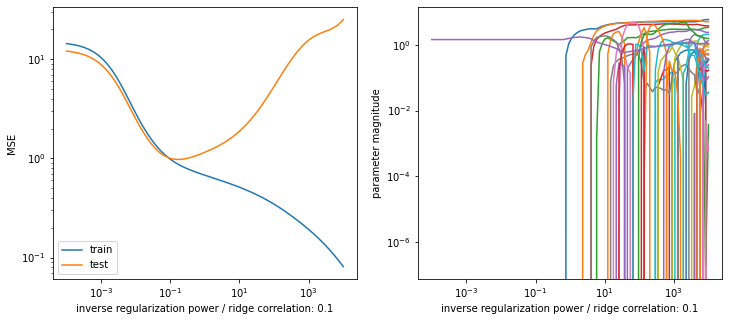

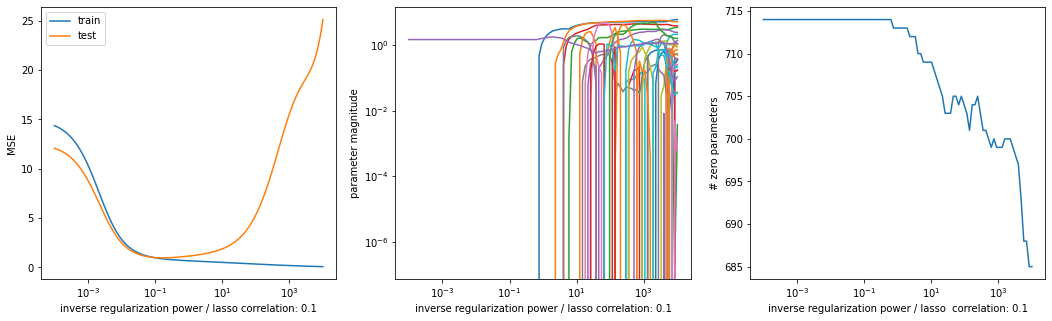

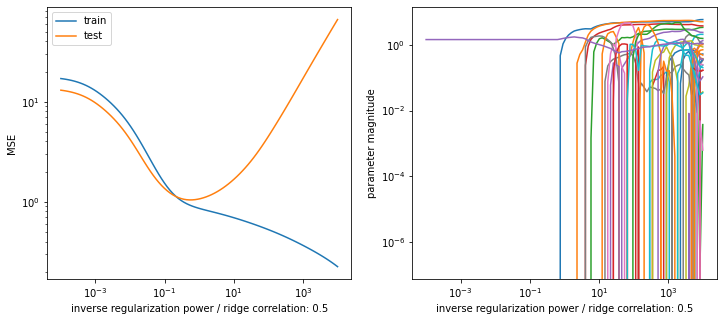

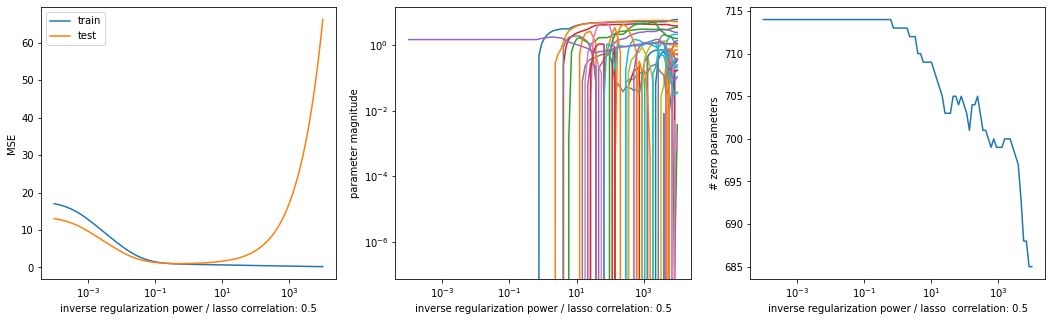

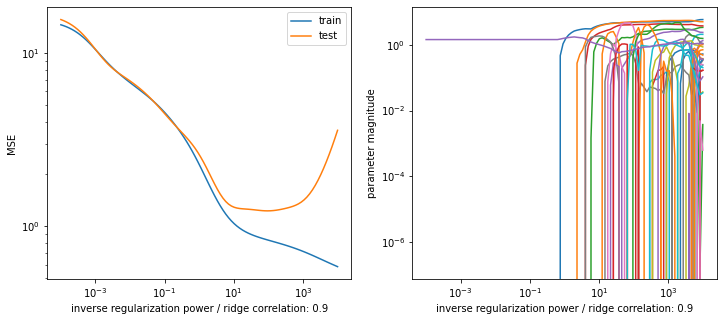

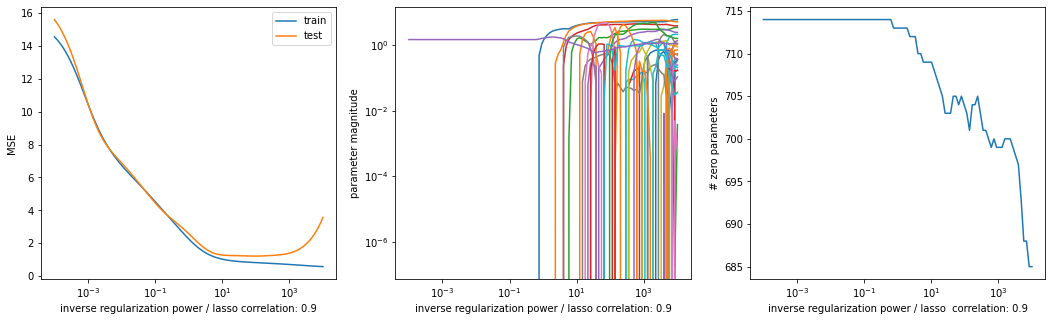

In [36]:
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso # L1
from sklearn.linear_model import Ridge # L2

for correlation in [0.1, 0.5, 0.9]:
  # dataset to fit (no need to split into train/test in this task):
  X, y = gen_data(500, correlation)
  X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=39)

  # regularization powers:
  alpha_values = np.logspace(-4, 4, 100, base=10)

  # lists to collect models' parameters:
  params_ridge = []
  params_lasso = []
  train_mse = []
  test_mse = []
  train_mse2=[]
  test_mse2 = []
  for alpha in tqdm(alpha_values):
      linear_model = Ridge(alpha=alpha)
      model = make_pipeline(
        PolynomialFeatures(9, include_bias=False),
        linear_model
      )
      model.fit(X_train, y_train)

      params_ridge.append(
          np.append(linear_model.coef_,
                    linear_model.intercept_)
      )

      train_mse.append(mean_squared_error(y_train, model.predict(X_train)))
      test_mse.append(mean_squared_error(y_test, model.predict(X_test)))

      linear_model2 = Lasso(alpha=alpha, max_iter=1000000)
      model2 = make_pipeline(
        PolynomialFeatures(9, include_bias=False),
        linear_model2
      )
      model2.fit(X_train, y_train)

      params_lasso.append(
          np.append(linear_model2.coef_,
                    linear_model2.intercept_)
      )

      train_mse2.append(mean_squared_error(y_train, model.predict(X_train)))
      test_mse2.append(mean_squared_error(y_test, model.predict(X_test)))

  params_ridge = np.array(params_ridge)


  plt.figure(figsize=(12, 5))

  plt.subplot(1, 2, 1)

  plt.plot(1. / reg_powers, train_mse, label='train')
  plt.plot(1. / reg_powers, test_mse, label='test')
  plt.ylabel('MSE')
  plt.xlabel('inverse regularization power / ridge correlation: '+str(correlation))
  plt.legend()
  plt.xscale('log')
  plt.yscale('log')

  plt.subplot(1, 2, 2)
  plt.plot(1. / reg_powers, np.abs(params));
  plt.xlabel("inverse regularization power / ridge correlation: "+str(correlation))
  plt.ylabel("parameter magnitude")
  plt.xscale('log')
  plt.yscale('log')
  
  params_lasso=np.array(params_lasso)
  plt.figure(figsize=(18, 5))

  plt.subplot(1, 3, 1)

  plt.plot(1. / reg_powers, train_mse, label='train')
  plt.plot(1. / reg_powers, test_mse, label='test')
  plt.ylabel('MSE')
  plt.xlabel('inverse regularization power / lasso correlation: '+str(correlation))
  plt.legend()
  plt.xscale('log')

  plt.subplot(1, 3, 2)
  plt.plot(1. / reg_powers, np.abs(params));
  plt.xlabel("inverse regularization power / lasso correlation: "+str(correlation))
  plt.ylabel("parameter magnitude")
  plt.xscale('log')
  plt.yscale('log')

  plt.subplot(1, 3, 3)
  plt.plot(1. / reg_powers, np.isclose(params, 0.).sum(axis=1));
  plt.xlabel("inverse regularization power / lasso  correlation: "+str(correlation))
  plt.ylabel("# zero parameters")
  plt.xscale('log')
